# CS 171 Homework 6

In this homework assignment, you will explore stock data using a Principal Component Analysis. (Can you believe it? Prof. Wood gives an example that doesn't pertain to Earth Science?!)

**Import the modules for this notebook**

Begin by importing any pertinent modules for PCA and visualizing model results:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
from scipy import linalg
import pandas as pd

In this homework assignment, you'll work with data from the Nasdaq - a key stock market index in the United States. The Nasdaq is an index made up of individual stocks (many of them tech companies). You can download historical Nasdaq data [HERE](https://www.nasdaq.com/market-activity/quotes/historical). In this assignment, we'll take a look at historical data from the overal Nasdaq composite (symbol: COMP) and 10 major Nasdaq stocks given by the following symbols:

In [2]:
symbols = ['AMD','AMZN','APPL','CSCO','META','MSFT',
           'NFLX','QCOM','SBUX','TSLA']

## Problem 6.1: Plot the data
To get familiar with this data, make a plot comparing the closing prices of each stock given by the list above. Your stocks should all be shown on the same plot with labeled axes, a legend, and other formatting, as appropriate. 

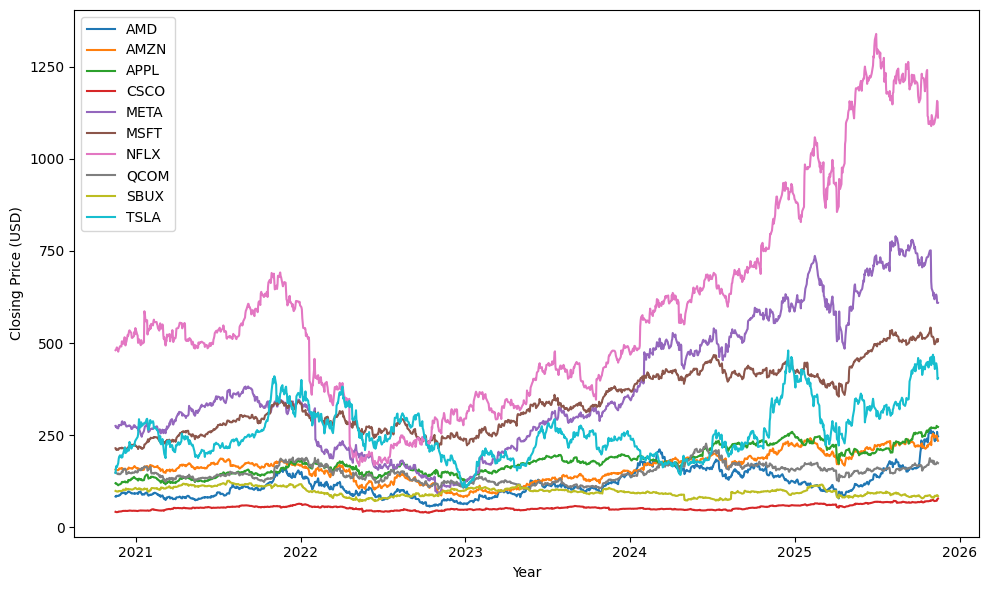

In [3]:
# make your plot here
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))

dataframes = {}

for symbol in symbols:
    df = pd.read_csv(f"Homework6_Data/HistoricalData_{symbol}.csv")
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
    df = df.sort_values('Date')
    dataframes[symbol] = df
    ax.plot(df['Date'], df['Close/Last'], label=symbol)

# Format x-axis to show only years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Reduce y-axis ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(6))

ax.set_xlabel('Year')
ax.set_ylabel('Closing Price (USD)')
ax.legend()
plt.tight_layout()
plt.show()


## Problem 6.2: PCA
Next, complete the steps to perform a principal component analysis on the data. Be sure to pre-process the data as needed and create a plot of your transformed data prior to computing the PCA steps.

In [4]:
# just use the last computed dataframe, they're probably all of the same structure
df.head()

,Date,Close/Last,Volume,Open,High,Low
1254,2020-11-17,147.2033,183564858,$153.39,$154.00,$144.3367
1253,2020-11-18,162.2133,234132083,$149.45,$165.3333,$147.8334
1252,2020-11-19,166.4233,187426069,$164.00,$169.537,$162.5233
1251,2020-11-20,163.2033,98735770,$165.9967,$167.50,$163.02
1250,2020-11-23,173.9500,150780915,$167.8333,$175.3333,$167.2633


In [5]:
df.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

Convert the open, high and low values to float64 values:

In [6]:
for symbol in symbols:
    df = dataframes[symbol]
    df['Open'] = df['Open'].str.replace('$', '').astype(float)
    df['High'] = df['High'].str.replace('$', '').astype(float)
    df['Low'] = df['Low'].str.replace('$', '').astype(float)

df.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

Now plot the preprocessed data:

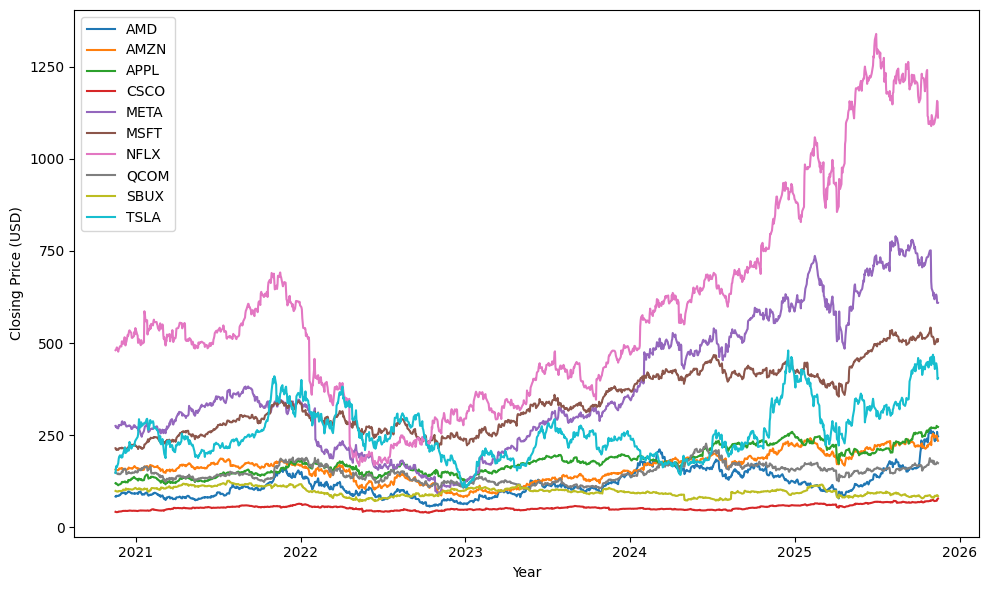

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

for symbol in symbols:
    df = dataframes[symbol]
    ax.plot(df['Date'], df['Close/Last'], label=symbol)

# Format x-axis to show only years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Reduce y-axis ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(6))

ax.set_xlabel('Year')
ax.set_ylabel('Closing Price (USD)')
ax.legend()
plt.tight_layout()
plt.show()

Now perform the PCA:

In [8]:
# compute the PCA steps
X = np.column_stack([dataframes[symbol]['Close/Last'].values for symbol in symbols])
for i in range(np.shape(X)[1]):
    vals = X[:, i]
    vals = (vals - np.mean(vals)) / np.std(vals)
    X[:, i] = vals

In [9]:
C = np.cov(X, rowvar=False)

In [10]:
values, vectors = linalg.eig(C)

In [11]:
values = np.real(values)

sorted_indices = np.argsort(values)[::-1]
values = values[sorted_indices]
vectors = vectors[:, sorted_indices]

In [12]:
variance_explained = 100 * values / np.sum(values)

print("Variance explained by each principal component:")
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var:.2f}%")

Variance explained by each principal component:
PC1: 64.03%
PC2: 13.27%
PC3: 7.80%
PC4: 6.16%
PC5: 3.98%
PC6: 2.24%
PC7: 1.43%
PC8: 0.60%
PC9: 0.32%
PC10: 0.18%


## Problem 6.3: Comparison with the Composite
In the next step, make a plot showing the projection of the stock market data onto the first principal component ($\tau$ i.e. the eigenvector corresponding to the largest eigenvalue). On the same plot, show the composite of the Nasdaq. Both data sets should be shown on visually-comparable scales (i.e. use one y-axis for one set, and the other y-axis for the other).

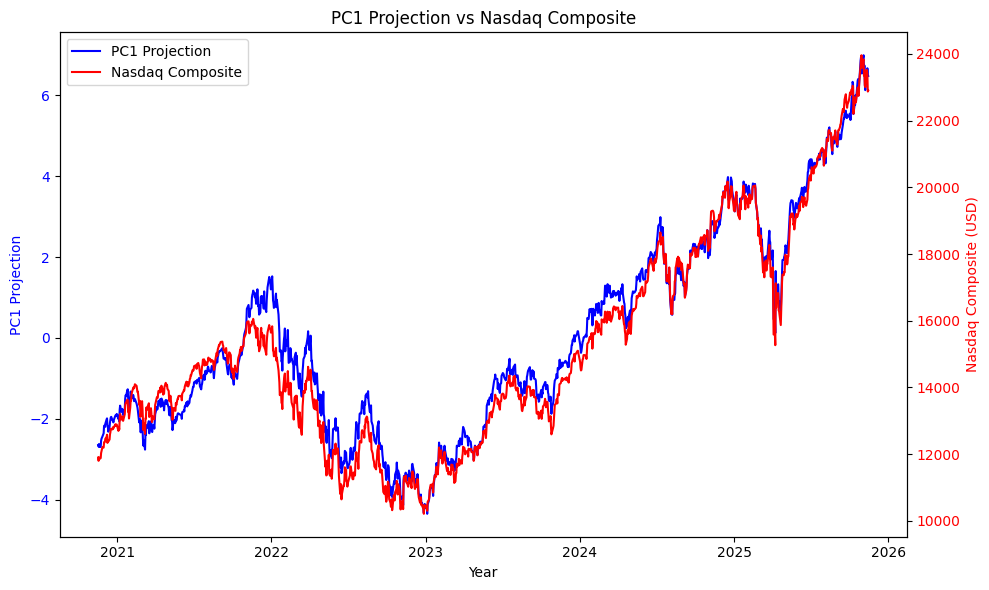

In [20]:
# make your plot here

PC1 = X @ vectors[:, 0]

comp_df = pd.read_csv("Homework6_Data/HistoricalData_COMP.csv")
comp_df['Date'] = pd.to_datetime(comp_df['Date'], format='%m/%d/%Y')
comp_df = comp_df.sort_values('Date')

dates = dataframes[symbols[0]]['Date'].values

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PC1 projection on left y-axis
ax1.plot(dates, PC1, 'b-', label='PC1 Projection')
ax1.set_xlabel('Year')
ax1.set_ylabel('PC1 Projection', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis for the Nasdaq composite
ax2 = ax1.twinx()
ax2.plot(comp_df['Date'], comp_df['Close/Last'], 'r-', label='Nasdaq Composite')
ax2.set_ylabel('Nasdaq Composite (USD)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('PC1 Projection vs Nasdaq Composite')
plt.tight_layout()
plt.show()

How do these two curves compare? Why?

These curves are very similar; this is likely because the first principle component accounts for a large majority of the variation in this data (64.03%), so it would be expected to match the NASDAQ composite quite well.

## Problem 6.4: Factor Loadings
In the next step, compute the factor loading matrix for this data. Then, plot the loadings for the first and second principal components.

In [16]:
# compute the factor loading matrix
A = vectors @ np.sqrt(np.diag(values))

Text(0, 0.5, 'Principal Component 2')

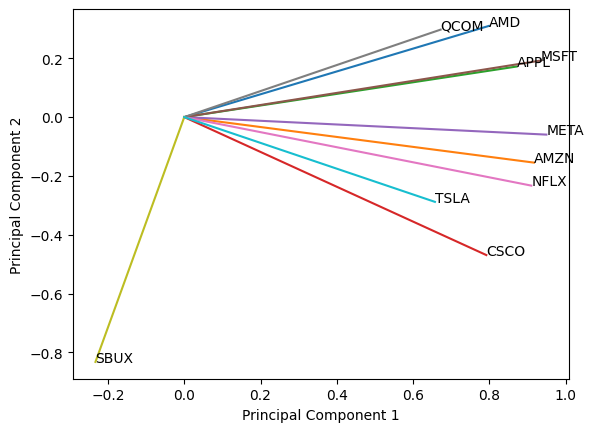

In [17]:
# plot the loadings here
for i, symbol in enumerate(symbols):
    plt.plot([0, A[i, 0]], [0, A[i, 1]], '-')
    plt.text(A[i, 0], A[i, 1], symbol)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Based on your plot, identify two stocks that **strongly co-vary** along PC1. Plot the time series of closing prices for these stocks here.

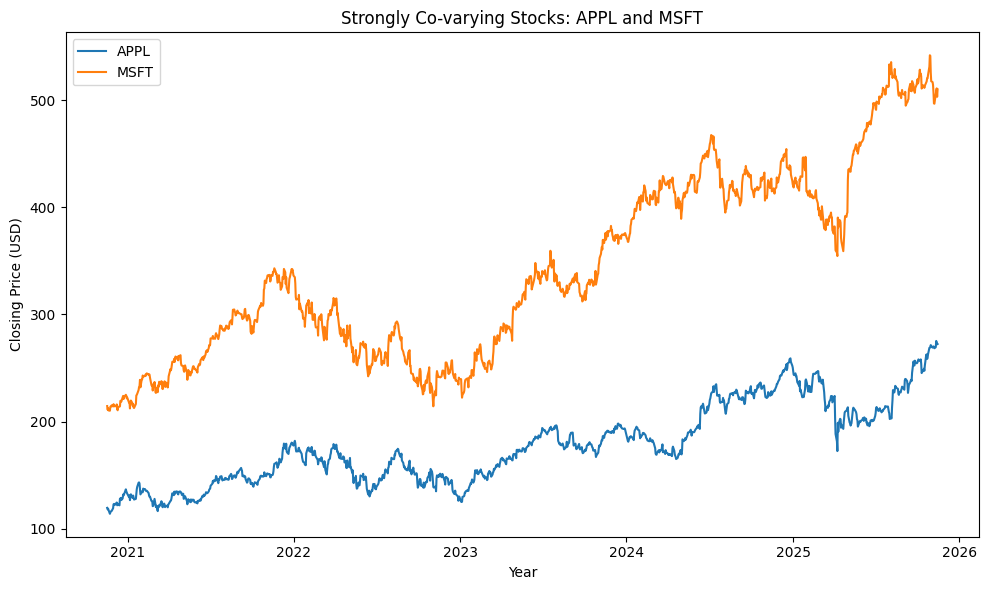

In [21]:
# make your plot here
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dataframes['APPL']['Date'], dataframes['APPL']['Close/Last'], label='APPL')
ax.plot(dataframes['MSFT']['Date'], dataframes['MSFT']['Close/Last'], label='MSFT')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price (USD)')
ax.legend()
plt.title('Strongly Co-varying Stocks: APPL and MSFT')
plt.tight_layout()
plt.show()

How do these time series compare? Why is this behavior expected based on your factor loading plot?

These two time series hahve similar variance through time; while they don't have the exact same values at any single point, the progression of how these stock prices move are extremely similar. This is expected given that the two stocks have a very similar variance on the principle component plot.

Based on your factor loading plot, identify two stocks that **oppositely co-vary** along PC2. Plot the time series of closing prices for these stocks here.

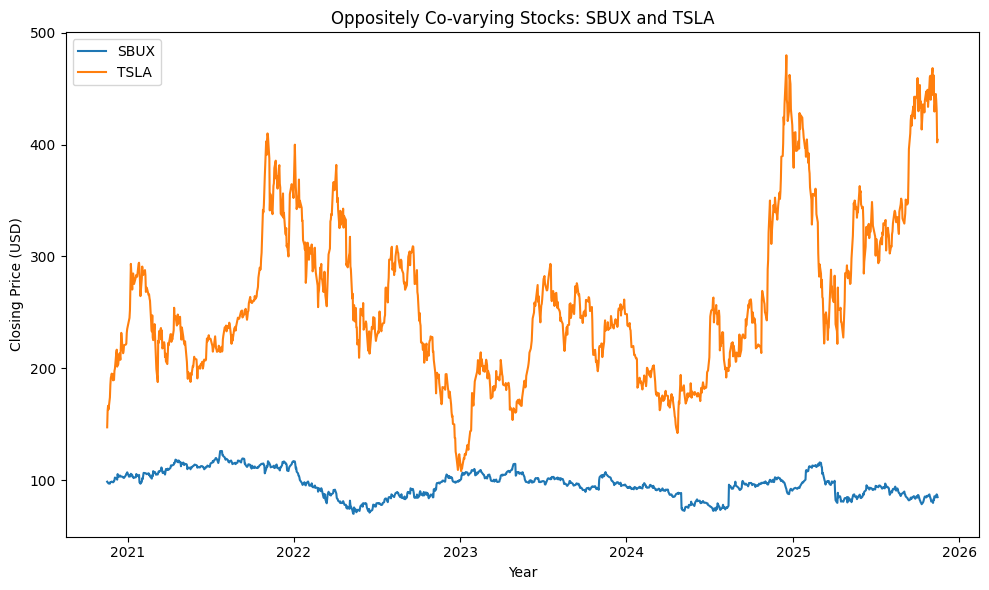

In [23]:
# make your plot here
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dataframes['SBUX']['Date'], dataframes['SBUX']['Close/Last'], label='SBUX')
ax.plot(dataframes['TSLA']['Date'], dataframes['TSLA']['Close/Last'], label='TSLA')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price (USD)')
ax.legend()
plt.title('Oppositely Co-varying Stocks: SBUX and TSLA')
plt.tight_layout()
plt.show()

How do these time series compare? Why is this behavior expected based on your factor loading plot?

The variance of these two time series are extremely different. The Tesla stock varies greatly through time, while the Starbucks stock has very little variance. This is to be expected based on the fact that the PCA graph for SBUX and TSLA are at a 90 degree angle from each other (orthogonal), indicating that they inversely covary.

Based on your factor loading plot, identify one **outlier stock**. Is this expected?

The clear outlier is Starbucks, which is at a stark angle away from the rest of the stocks. This is somewhat expected based on the fact that Starbucks is not exactly the same level of tech giant that these other companies are, and they also have remained rather steady in business through time, so their variance wouldn't be likely to match these other companies.